# GoodReads Data
## Why this Data?
Though I am not avid reader but I read books quite sometimes. thats why I am intrested to do the analysis on this data. GoodReads is a quite poupular and reliable source for all type of books, you can get a copy, summary, review and many other things regarding books.

# Overview of Data
`bookID` = It contains the id of books, starting from one to n number of obervations.
<br>
`title` = It contains the titel fo book.
<br>
`authors` = It contains the outhor of book.
<br>
`average_rating` = It contains the rating of a book. from 0 to 5
<br>
`cust_satisfaction` = It states the satisfaction of a customer.
<br>
If rating is between 0-1 then satisfaction would be "didn't like it", 
<br>
[1-2 = 'it was OK'], 
<br>
[2-3 = 'liked it'],
<br>
[3-4 = 'Really liked it'], 
<br>
[4-5 = 'it was amazing']
<br>
`isbn` = Unique identifier of the book.
<br>
`language_code` = language of the book written in.
<br>
`num_pages` = Number of pages in the book.
<br>
`ratings_count` = Total number of users who has given ratings to the book.
<br>
`text_reviews_count` = Total number of user who has given review in text form.
<br>
`publication_date` = Date of publication of the book.
<br>
`publisher` = Name of the publisher.
<br>
<br>
Number of observations = 11127
<br>
number of columns = 12

# [EDA](#EDA)

## Questions that are answered in this Analysis :-

### [Univariate](#Univariate)
* [Average book rating.](#Average-book-rating.)
* [Average number of pages.](#Average-number-of-pages.)
* [Highest and Lowest Rated books.](#Highest-and-Lowest-Rated-books.)
* [Average customer satisfaction.](#Average-customer-satisfaction.)
* [most number book published by an author.](#Top-10)
* [Book with highest number of pages.](#highest-pages)
* [Book with most Text and Non-text Reviews Count.](#highest-reviews-count)
* [Oldest Published book.](#Oldest)
* [Newest Published book.](#Newest)
* [Authors with highest average ratings.](#author)
* [Most common language of books.](#Lang)
* [Most common Publisher.](#pub)
* [In which year most books were published?](#year)

### [Bivariate](#Bivariate)
* [Does Number of pages affects the average ratings of the books?](#pages)
* [Better rating tends to more text review count?](#text)
* [As the time goes the average rating of the books increases?](#time)

## Overview

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [334]:
books = pd.read_csv('books.csv')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [335]:
print(books.dtypes)
books.shape

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object


(11127, 12)

In [336]:
#dropping isbn13 column
books.drop('isbn13',axis=1, inplace= True)

In [337]:
#fixing numpages column name
books.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [338]:
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# Data Preprocessing

## Publication date
- change data type of publication date to 'datetime'

In [339]:
#changin publication date to datetime datatype
books['publication_date'] = pd.to_datetime(books['publication_date'],format= '%m/%d/%Y',errors='coerce')
books.dtypes


bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [340]:
print(books.isna().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64


In [341]:
#filling nan values to mode value.

# print(books.publication_date.mode())
books['publication_date']= books.publication_date.fillna(value = '2005-10-01')
print(books.isna().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


## Average Rating
- creating Category column for average rating.

In [342]:
print(books.average_rating.min())
print(books.average_rating.max())


0.0
5.0


In [343]:
bins = [0, 1, 2, 3, 4, 5]
bins_labes = ['didn\'t like it', 'it was OK', 'liked it', 'Really liked it', 'it was amazing']

books['cust_satisfaction'] = pd.cut(books['average_rating'], bins, labels= bins_labes)
books.head()

,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cust_satisfaction
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,it was amazing
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,it was amazing
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,eng,352,6333,244,2003-11-01,Scholastic,it was amazing
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,it was amazing
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,eng,2690,41428,164,2004-09-13,Scholastic,it was amazing


In [344]:
order = ['didn\'t like it', 'it was OK', 'liked it', 'Really liked it', 'it was amazing']
books['cust_satisfaction'] = pd.Categorical(books['cust_satisfaction'], order, ordered= True)
books.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
cust_satisfaction           category
dtype: object

In [345]:
#reordering columns 

books = books[['bookID', 'title', 'authors', 'average_rating', 'cust_satisfaction', 'isbn', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']]
books.head()

,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,it was amazing,439785960,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,it was amazing,439358078,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,it was amazing,439554896,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,it was amazing,043965548X,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,it was amazing,439682584,eng,2690,41428,164,2004-09-13,Scholastic


# EDA<a class="anchor" id="EDA"></a>

## Univariate<a class="anchor" id="Univariate"></a>

- Average book rating.<a class="anchor" id="Average-book-rating."></a>
- Average number of pages.<a class="anchor" id="Average-number-of-pages."></a>

In [346]:
avg_rating = books.average_rating.mean()
avg_num_page = books.num_pages.mean()
print('average book rating is ' + str(round(avg_rating, ndigits= 1)))
print('average number of pages is '+ str(round(avg_num_page)))
print('Average rating is 3.9, therefore the most common customer satisafaction would be \'Really liked it\'')


average book rating is 3.9
average number of pages is 336
Average rating is 3.9, therefore the most common customer satisafaction would be 'Really liked it'


- Highest and Lowest Rated books.<a class="anchor" id="Highest-and-Lowest-Rated-books."></a>

In [347]:
highest = books[books.average_rating == 5.0].sort_values('average_rating', ascending = False)
print(highest[['title','average_rating']])
cnt = highest.title.count()
print('There are ' + str(cnt) + ' highest Rated books rating of 5.0')

                                                   title  average_rating
624    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...             5.0
786                    Willem de Kooning: Late Paintings             5.0
9897   His Princess Devotional: A Royal Encounter Wit...             5.0
9851   The American Campaign: U.S. Presidential Campa...             5.0
9724       The Irish Anatomist: A Study of Flann O'Brien             5.0
9328                  Tyrannosaurus Wrecks (Stanley  #1)             5.0
9286   Oliver Wendell Holmes in Paris: Medicine  Theo...             5.0
8547        Fanning the Flame: Bible  Cross  and Mission             5.0
6778   Delwau Duon: Peintiadau Nicholas Evans = Symph...             5.0
6250                         The New Big Book of America             5.0
6187                           Taxation of Mineral Rents             5.0
5650   Colossians and Philemon: A Critical and Exeget...             5.0
5649                                 Winchester Sho

In [348]:
lowest = books[books.average_rating == 0.0].sort_values('average_rating', ascending = True)
print(lowest[['title','average_rating']])
cnt2 = lowest.title.count()
print('There are ' + str(cnt2) + ' Lowest Rated books rating of 0.0')

                                                   title  average_rating
265    Out to Eat London 2002 (Lonely Planet Out to Eat)             0.0
10501  The Fantastic Vampire: Studies in the Children...             0.0
10142                                      Day and Night             0.0
9441   Classroom Interactions as Cross-Cultural Encou...             0.0
9335       Random House Crossword Mega Omnibus  Volume 1             0.0
8979   Brown's Star Atlas: Showing All The Bright Sta...             0.0
7800                   Beckett Football Card Price Guide             0.0
7637        Your Child and Jesus: A Family Activity Book             0.0
7576                            The Berlin Phenomenology             0.0
7402                    Sclerotherapy and vein treatment             0.0
7147   Mythographi Graeci 1: Apollodori Bibliotheca  ...             0.0
6880   I'll Be Home Before Midnight and I Won't Get P...             0.0
6862                            The Road To War  19

- Average customer satisfaction.<a class="anchor" id="Average-customer-satisfaction."></a>

Really liked it    6288
it was amazing     4735
liked it             69
it was OK             7
didn't like it        2
Name: cust_satisfaction, dtype: int64


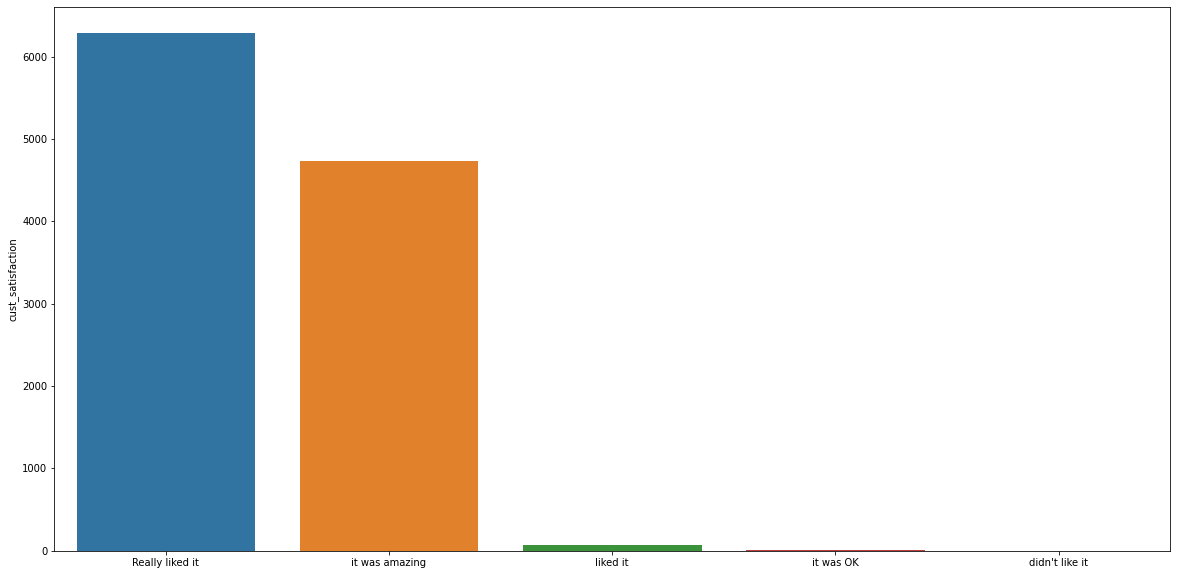

In [349]:
new = books.cust_satisfaction
new2 = books.cust_satisfaction.value_counts(ascending= False)
print(new2)

plt.figure(figsize=(20,10))
sns.barplot(x = new2.index, y = new2, order= new2.index)
plt.show()

- Most number book published by an author. (Top 10)<a class="anchor" id="Top-10"></a>

In [350]:
auth = books.authors.value_counts().sort_values(ascending = False)[0:10]
print(auth)

Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Margaret Weis/Tracy Hickman    23
Name: authors, dtype: int64


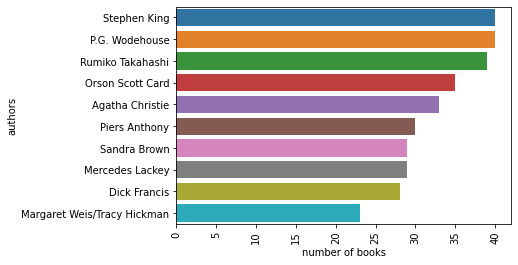

In [351]:
sns.barplot(x=auth, y = auth.index)
plt.xticks(rotation = 90)
plt.ylabel('authors')
plt.xlabel('number of books')
plt.show()

- Book with highest number of pages.<a class="anchor" id="highest-pages"></a>

In [352]:
display(books.sort_values('num_pages',ascending= False)[0:1])
print('book named \'The Complete Aubrey/Maturin Novels (5 Volumes)\' have highest number of pages with 6576.')

,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,it was amazing,039306011X,eng,6576,1338,81,2004-10-17,W. W. Norton Company


book named 'The Complete Aubrey/Maturin Novels (5 Volumes)' have highest number of pages with 6576.


- Book with most Text and Non-text Reviews Count.<a class="anchor" id="highest-reviews-count"></a>

In [353]:
display(books.sort_values('text_reviews_count', ascending= False)[0:1])
display(books.sort_values('ratings_count', ascending= False)[0:1])
print('book named Twilight (Twilight #1) got the Highest number of both text and Non-text reviews count with 94265 and 4597666')

,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,Really liked it,316015849,eng,501,4597666,94265,2006-09-06,Little Brown and Company


,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,Really liked it,316015849,eng,501,4597666,94265,2006-09-06,Little Brown and Company


book named Twilight (Twilight #1) got the Highest number of both text and Non-text reviews count with 94265 and 4597666


- Oldest Published book.<a class="anchor" id="Oldest"></a>

In [354]:
display(books.sort_values('publication_date', ascending= True)[0:1])
print('Book named \'Iain Crichton Smith/Isobel Murray\' is the oldest publicised book, it was published in 1900-01-01 by the \'Plygon\' Publisher')

,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
9375,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,Really liked it,753812932,eng,144,332,33,1900-01-01,Polygon


Book named 'Iain Crichton Smith/Isobel Murray' is the oldest publicised book, it was published in 1900-01-01 by the 'Plygon' Publisher


- Newest Published book.<a class="anchor" id="Newest"></a>

In [355]:
display(books.sort_values('publication_date', ascending= False)[0:1])
print('Book named \'A Quick Bite (Argeneau #1)\' is the Newest publicised book, it was published in 2020-03-31 by the \'Avon\' Publisher')

,bookID,title,authors,average_rating,cust_satisfaction,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
9668,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,Really liked it,60773758,eng,360,35275,1370,2020-03-31,Avon


Book named 'A Quick Bite (Argeneau #1)' is the Newest publicised book, it was published in 2020-03-31 by the 'Avon' Publisher


- Authors with highest average ratings.<a class="anchor" id="author"></a>

In [356]:
auth_rate = books.groupby('authors').average_rating.mean()
sorted = auth_rate.sort_values(ascending = False).head(20)
print(sorted)
print('There are 18 authors who got average rating on 5.0')

authors
Aristophanes/F.W. Hall/W.M. Geldart                     5.00
Sara Barton-Wood                                        5.00
Keith Donohue                                           5.00
Julie Sylvester/David Sylvester                         5.00
John  Diamond                                           5.00
R. McL. Wilson                                          5.00
James E. Campbell                                       5.00
Ian        Martin/Katie Elliott                         5.00
Nicholas    Evans/Rhonda  Evans                         5.00
Todd Davis/Marc Frey                                    5.00
Elena N. Mahlow                                         5.00
Middlesex Borough Heritage Committee                    5.00
Ross Garnaut                                            5.00
Dennis Adler/R.L. Wilson                                5.00
William C. Dowling                                      5.00
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.00
Sheri Rose Sheph

- Most common language of books.<a class="anchor" id="Lang"></a>

In [357]:
lang = books.language_code.value_counts()
print(lang)

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64


In [358]:
prop = lang/len(books)
print(prop)
print('80% of books written in english language, followed by en-Us takes 12% and spanish and french 0.01%')

eng      0.800845
en-US    0.126629
spa      0.019592
en-GB    0.019232
fre      0.012941
ger      0.008897
jpn      0.004134
mul      0.001708
zho      0.001258
grc      0.000989
por      0.000899
en-CA    0.000629
ita      0.000449
enm      0.000270
lat      0.000270
swe      0.000180
rus      0.000180
srp      0.000090
nl       0.000090
msa      0.000090
glg      0.000090
wel      0.000090
ara      0.000090
nor      0.000090
tur      0.000090
gla      0.000090
ale      0.000090
Name: language_code, dtype: float64
80% of books written in english language, followed by en-Us takes 12% and spanish and french 0.01%


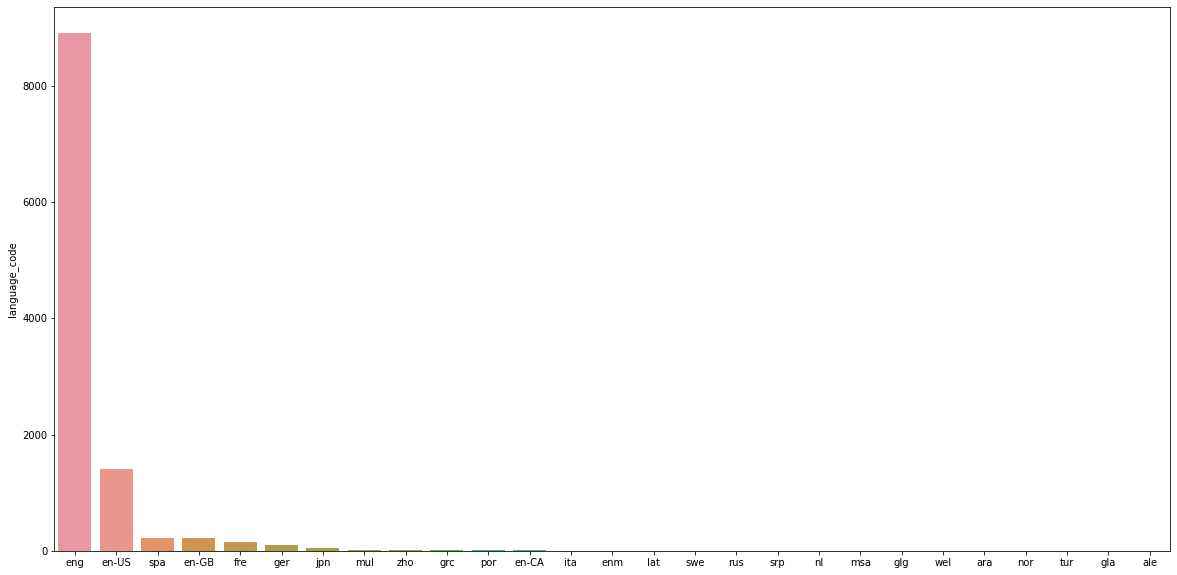

In [359]:
plt.figure(figsize= (20, 10))
sns.barplot(x = lang.index, y = lang)
plt.show()

- Most common Publisher.<a class="anchor" id="pub"></a>

In [360]:
pub = books.publisher.value_counts().head(20)
print(pub)
print('\'Vintage\' is the most commong publisher, published 318 books, followed by \'Penguin Books\' with 261 books published yet.')

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: publisher, dtype: int64
'Vintage' is the most commong publisher, published 318 books, followed by 'Penguin Books' with 261 books published yet.


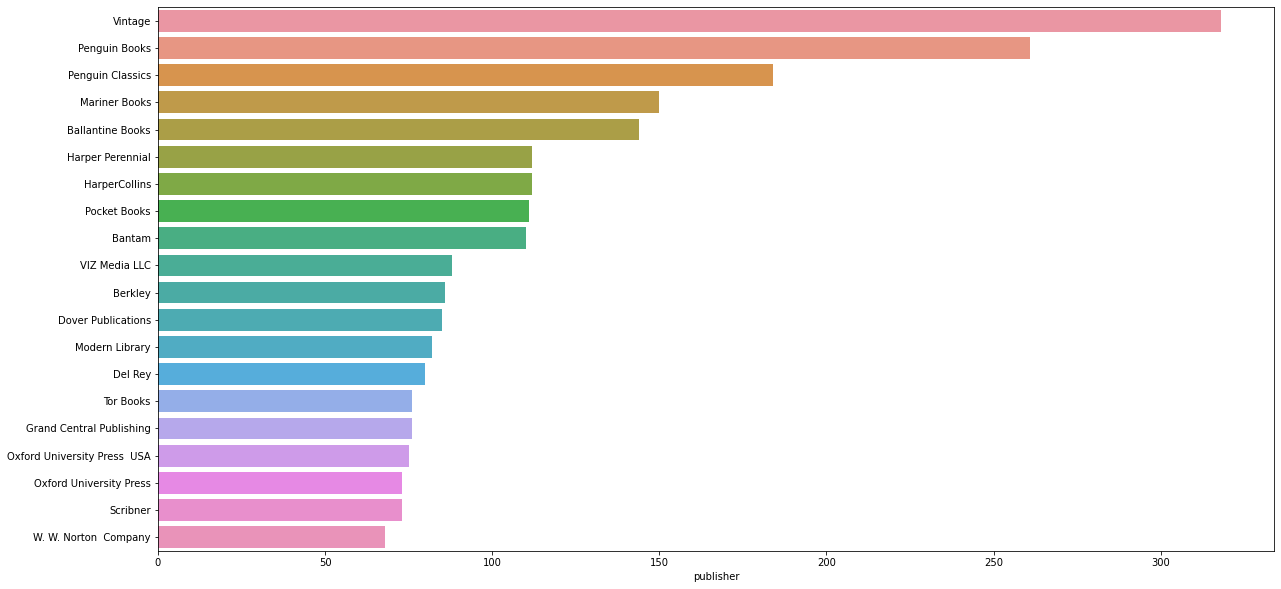

In [361]:
plt.figure(figsize= (20,10))
sns.barplot(x = pub , y = pub.index)
plt.show()


- In which year most books were published?<a class="anchor" id="year"></a>

In [362]:
books['year'] = books['publication_date'].dt.year
print(books.year.unique())
yr = books.year.value_counts().head(20)
print(yr)

[2006 2004 2003 2005 2002 1996 2001 2000 1990 1993 1997 1991 2012 1994
 1982 1986 1999 1987 1984 2007 1965 1998 1995 1964 1970 2011 1955 1988
 1985 1989 1963 2008 2009 1976 1975 1980 1992 1973 2019 1954 2015 1919
 1921 1923 1969 1968 1961 1953 1958 1983 1978 1929 1977 1979 1922 1981
 2010 1950 1971 1960 1959 2013 2017 2016 1972 1947 1943 1974 1957 2014
 2018 1952 1935 1956 1966 1925 1962 1949 1913 1928 1914 1948 1967 1900
 2020 1931 1940]
2006    1700
2005    1262
2004    1071
2003     931
2002     798
2001     656
2000     533
2007     518
1999     451
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: year, dtype: int64


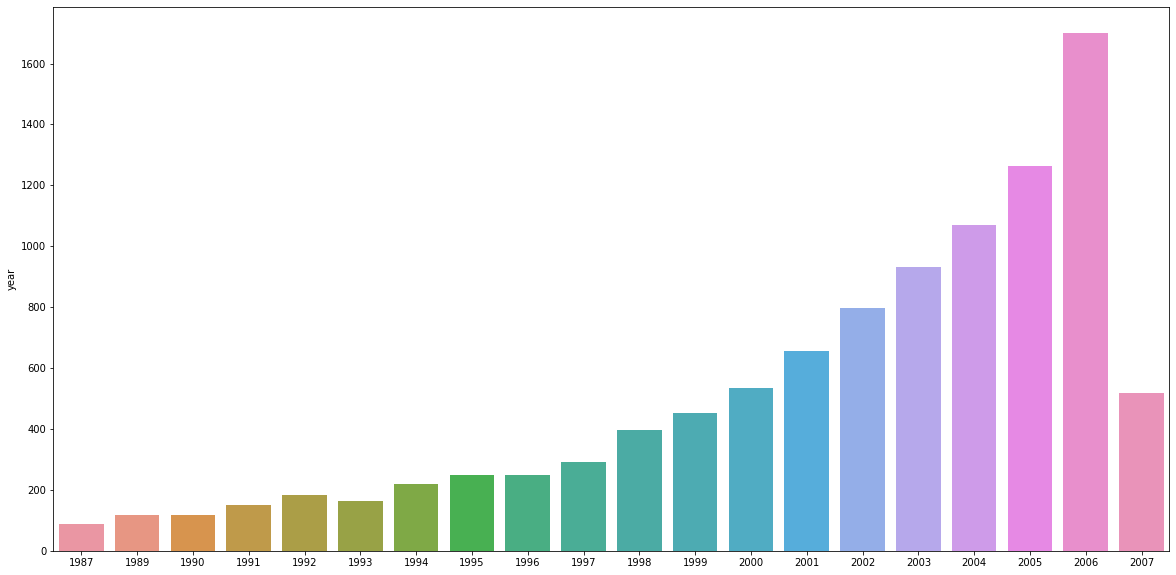

1700 books published in the year 2006 which makes it the highest published year.


In [363]:
plt.figure(figsize= (20,10))
sns.barplot(x = yr.index, y = yr)
plt.show()
print('1700 books published in the year 2006 which makes it the highest published year.')

## Bivariate<a class="anchor" id="Bivariate"></a>

- Does Number of pages affects the average ratings of the books?<a class="anchor" id="pages"></a>

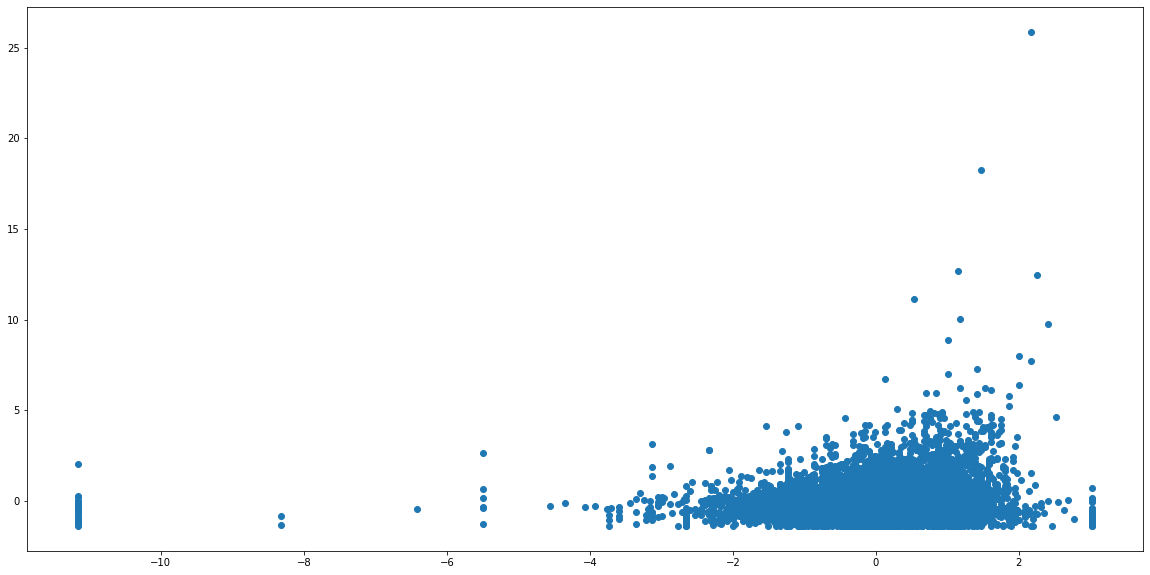

There isn't any patterns in above scatter plot, we can probably guess that the variables are not associated.


In [364]:
#standardisation of two variables.

data = books[['average_rating', 'num_pages']].to_numpy()
scaler = StandardScaler()
standard_data = scaler.fit_transform(data)

plt.figure(figsize=(20,10))
x = standard_data[:,0]
y = standard_data[:,1]
plt.scatter(x,y)
plt.show()

print('There isn\'t any patterns in above scatter plot, we can probably guess that the variables are not associated.')

In [365]:
corr, p = pearsonr(books.average_rating, books.num_pages)

print('correlation of both variable is ' + str(corr) + ' which is too close 0, by observing that we can assume there is no association between these two variables.')

correlation of both variable is 0.15080946153494185 which is too close 0, by observing that we can assume there is no association between these two variables.


- Better rating tends to more text review count?<a class="anchor" id="text"></a>

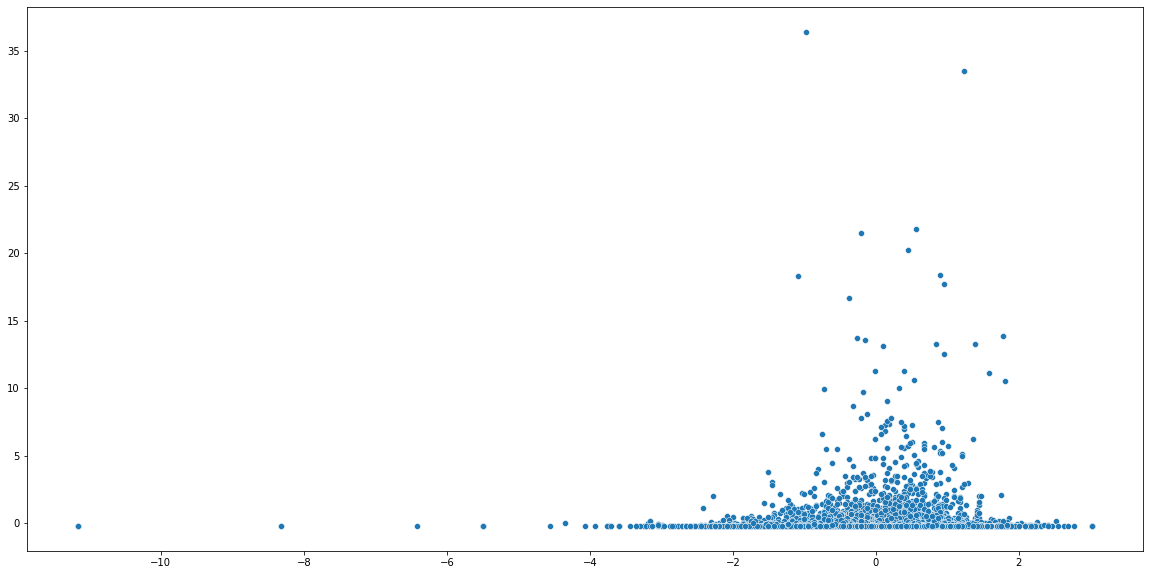

By looking at the above scatter plot there so vissible pattern of any rlation so we can assume that there is no association among these two variables.


In [366]:
#standardisation of two variables.

review = books[['average_rating', 'text_reviews_count']].to_numpy()
scaler1 = StandardScaler()
standard_data1 = scaler1.fit_transform(review)

rating = standard_data1[:,0]
text = standard_data1[:,1]

plt.figure(figsize=(20,10))
sns.scatterplot(x = rating, y = text)
plt.show()

print('By looking at the above scatter plot there so vissible pattern of any rlation so we can assume that there is no association among these two variables.')

In [367]:
correlation ,p = pearsonr(books.average_rating, books.text_reviews_count)
print(correlation)

print('The correlation of these two variables is ' + str(correlation) + ' which tends to almost 0, therefore we can conculde that there is no association between these two variables.')
print('Answer to the question is : No, better ratings does not gets more text reviews.')

0.03373431543028114
The correlation of these two variables is 0.03373431543028114 which tends to almost 0, therefore we can conculde that there is no association between these two variables.
Answer to the question is : No, better ratings does not gets more text reviews.


- As the time goes the average rating of the books increases?<a class="anchor" id="time"></a>

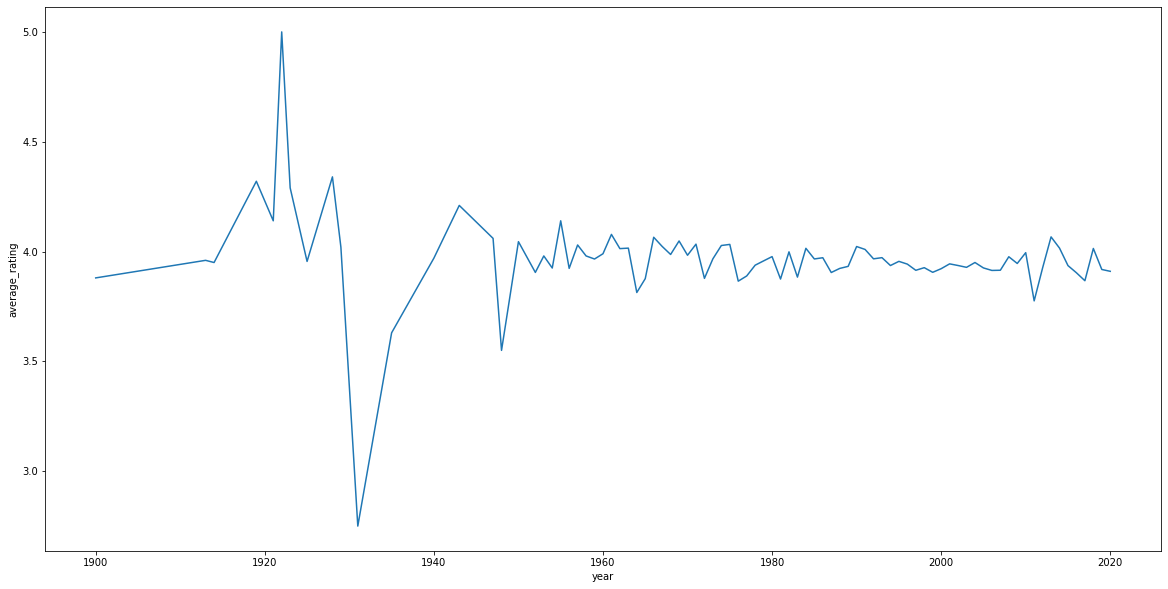

By the above line grave we an see that the average raing per year remains contant most of the years.
Therefore, answer to the question is 'No' average rating of the book does not increases as the time goes.


In [368]:
time = books.groupby('year').average_rating.mean()

plt.figure(figsize=(20,10))
sns.lineplot(x = time.index, y = time)
plt.show()

print('By the above line grave we an see that the average raing per year remains contant most of the years.')
print('Therefore, answer to the question is \'No\' average rating of the book does not increases as the time goes.')